In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.x_label = None
        self.move_u = None
        self.sse_list = []
        self.best_sse = 10000000
        self.best_u = None
        self.best_sse_list = []
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        start_point = self.make_random(X)
        for n in range(self.n_init):
            for iter in range(self.max_iter):
                self.calc(X, start_point)
                self.update_u(X)
                self.sse_calc(X)
                if np.sum(np.linalg.norm(np.array(self.move_u)-np.array(start_point), axis=1, ord=2)) < self.tol:
                    break
                else:
                    start_point = self.move_u
            if self.best_sse > self.sse_list[-1]:
                self.best_sse = self.sse_list[-1]
                self.best_sse_list = self.sse_list
                self.best_u = self.move_u
            self.sse_list = []

        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    def make_random(self, X):
        np.random.seed(0)
        random_num = np.random.choice(range(X.shape[0]), size = self.n_clusters)
        random_num = list(random_num)
        start_point = X[random_num]
        return start_point
    
    def calc(self, X, u_points):
        self.x_label = []
        for x in X:
            distance = []
            for u in u_points:
                sse = np.linalg.norm(x-u, ord=2)
                distance.append(sse)
            self.x_label.append(np.argmin(distance))
            
    
    def sse_calc(self, X):
        sse_total = 0
        for label in np.unique(self.x_label):
            X_uni_label = X[np.array(self.x_label)==label]
            u_uni_label = self.move_u[label]
            sse = np.linalg.norm(X_uni_label - u_uni_label, ord=2)
            sse_total += sse
        self.sse_list.append(sse_total)

        
    def update_u(self, X):
        self.move_u = []
        for label in np.unique(self.x_label):
            x1 = np.sum(X[np.array(self.x_label)==label][: , 0]) / len(X[np.array(self.x_label)==label])
            x2 = np.sum(X[np.array(self.x_label)==label][: , 1]) / len(X[np.array(self.x_label)==label])
            self.move_u.append([x1, x2])
        return self.move_u
        
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pred = []
        for x in X:
            distance = []
            for u in self.best_u:
                sse = np.linalg.norm(x-u, ord=2)
                distance.append(sse)
            pred.append(np.argmin(distance))

        return pred

# 問１〜問６まで

上記にて

In [3]:
from sklearn.datasets import make_blobs
import pdb
X, _ = make_blobs(n_samples=500, n_features=2, centers=8, cluster_std=3, shuffle=True, random_state=4)

In [4]:
X

array([[  8.67490795,   9.83387602],
       [  9.79845374,   4.93343074],
       [  9.58438809,   0.22307245],
       [  7.12354868,  -4.48336555],
       [ 11.66741461, -10.64220799],
       [ -5.2682509 ,  -3.57332802],
       [ 10.54777771,  -7.43309227],
       [  2.73453354,  -6.94737881],
       [  7.35624465, -12.76023671],
       [  6.48094754,  10.04207459],
       [ -5.2170854 ,  -1.95483571],
       [  1.02732423,  -1.80065869],
       [ -7.79301344,   1.07823696],
       [  3.94375718,  -6.09019393],
       [ -8.27163136,   1.96894283],
       [  9.4864058 ,   1.51058359],
       [ -4.59735466,   3.5134131 ],
       [  8.24507786,   5.67003852],
       [ -7.11408684,  -3.71993987],
       [ -4.62857429,  -4.96805091],
       [  7.82451265,  -7.31676505],
       [  7.51993493,   5.58558297],
       [  6.37350034,  -0.60063624],
       [  2.39411651,  -2.90573228],
       [  7.17240254,  -8.80584114],
       [ 10.19808084, -11.7172294 ],
       [  8.75800419, -10.93822199],
 

In [5]:
kmean = ScratchKMeans(n_clusters=3, n_init=5, max_iter=10, tol=0.001)

In [6]:
kmean.fit(X)

In [7]:
kmean.best_sse_list

[230.86214377210894,
 158.29095416501127,
 149.48538650418155,
 149.48538650418155]

In [8]:
kmean.x_label

[0,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 0,


In [9]:
kmean.best_u

[[8.772707382102908, 5.304900174776697],
 [-5.2248217831343915, 0.011682611497273588],
 [7.131010807227639, -7.091033132862334]]

# 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。

In [10]:
X_test, _ = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=3, shuffle=True, random_state=4)

In [11]:
pred = kmean.predict(X_test)

In [12]:
pred

[1,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0]

# 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。



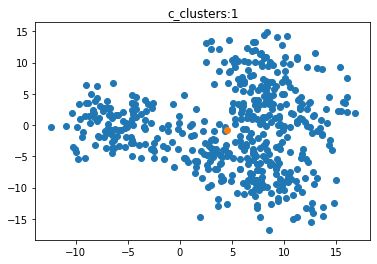

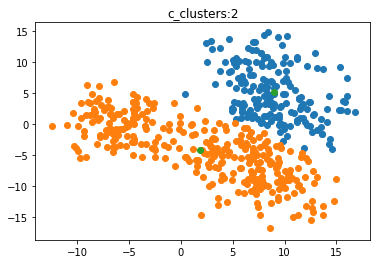

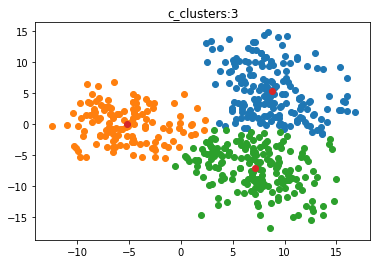

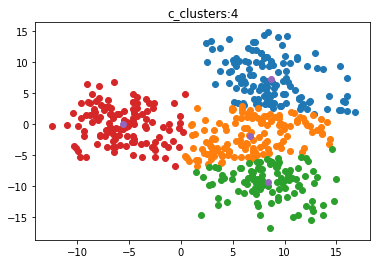

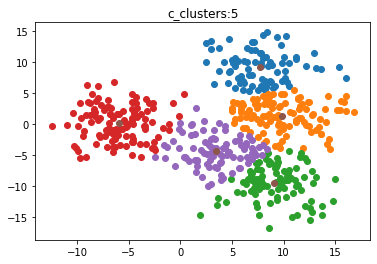

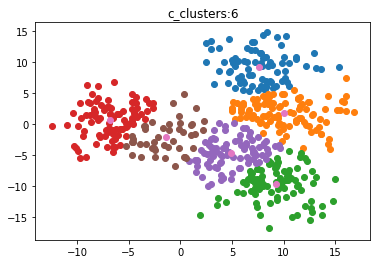

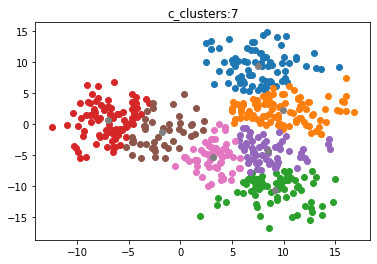

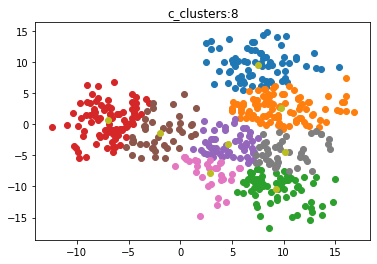

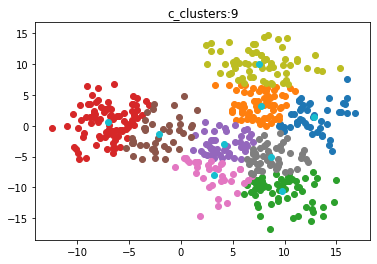

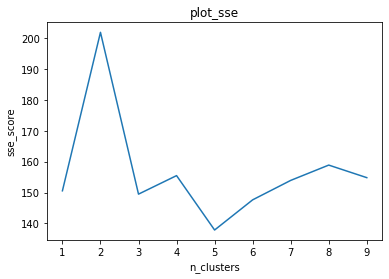

In [24]:
import matplotlib.pyplot as plt

def erubo(X):
    sse = []
    for i in range(1,10):
        km = ScratchKMeans(n_clusters=i, n_init=5, max_iter=10, tol=0.001)
        km.fit(X)
        sse.append(km.best_sse)
        xlabel = np.array(km.x_label)
        for l in np.unique(xlabel):
            plt.scatter(X[xlabel==l,0], X[xlabel==l, 1])
        plt.scatter(np.array(km.best_u)[:,0], np.array(km.best_u)[:, 1])
        plt.title("c_clusters:{}".format(i))
        plt.show()

    plt.plot(range(1, len(sse)+1), sse)
    plt.title("plot_sse")
    plt.xlabel("n_clusters")
    plt.ylabel("sse_score")
    plt.show()

erubo(X)

次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [18]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")

In [19]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
df_drop = df.drop(["Channel", "Region"], axis=1)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_drop)
data_pca = pca.transform(df_drop)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


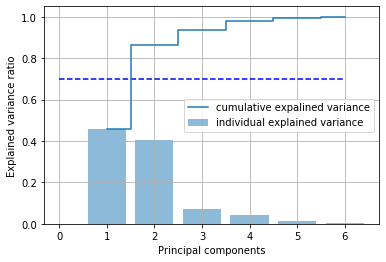

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df_drop)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 【問題10】クラスタ数kの選択\
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

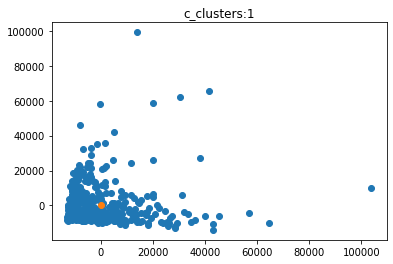

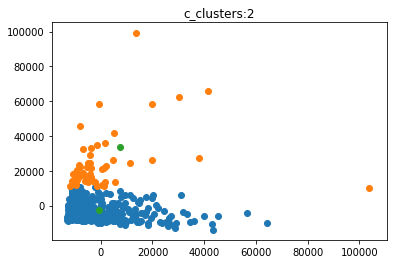

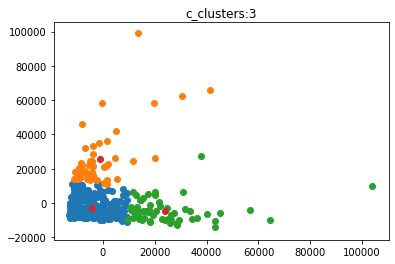

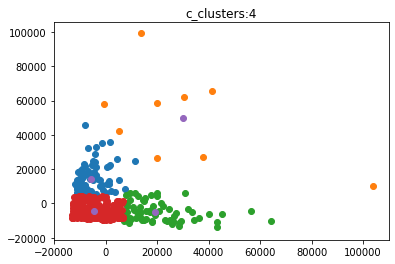

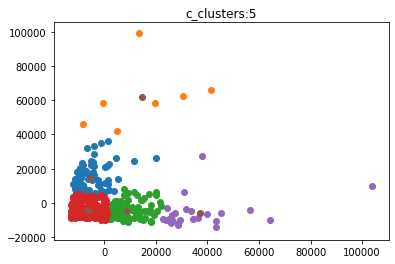

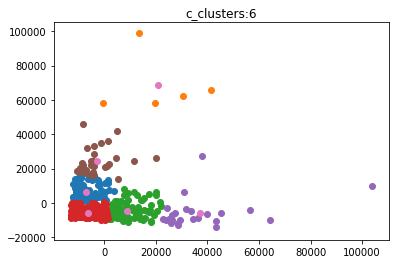

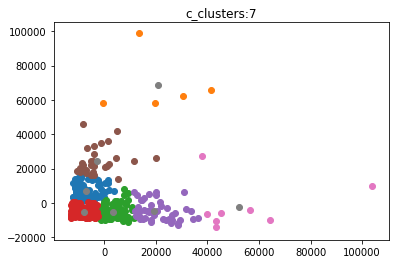

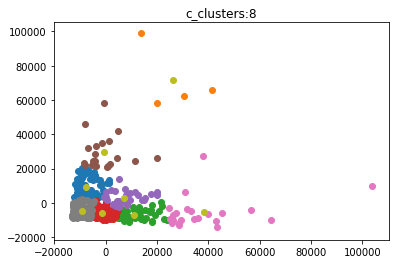

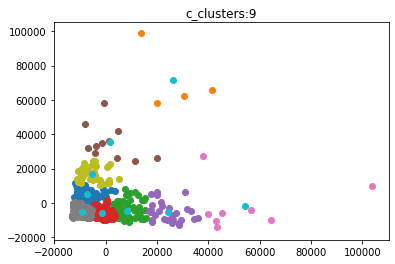

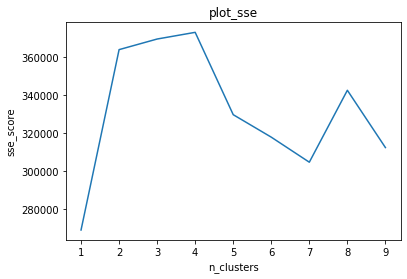

In [25]:
erubo(data_pca)

In [31]:
data_pca_rev1 = data_pca[data_pca[:, 1] < 40000]
data_pca_rev2 = data_pca_rev1[data_pca_rev1[:, 0] < 40000]

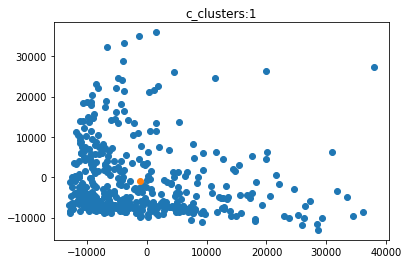

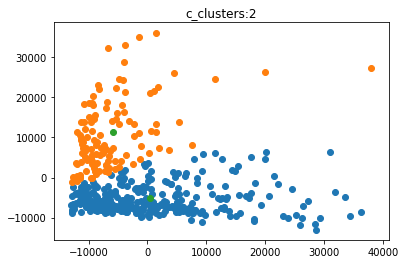

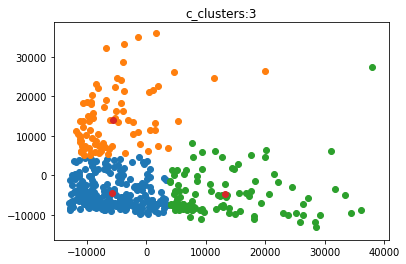

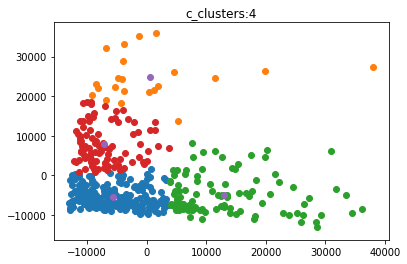

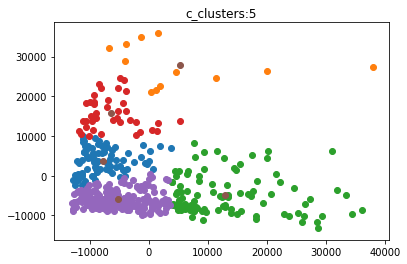

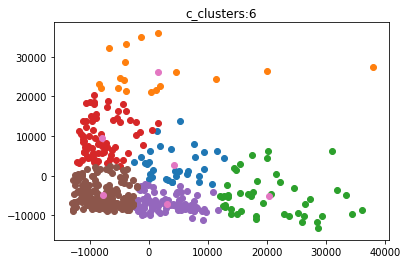

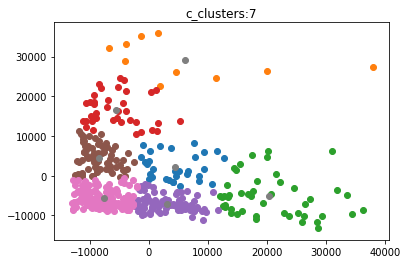

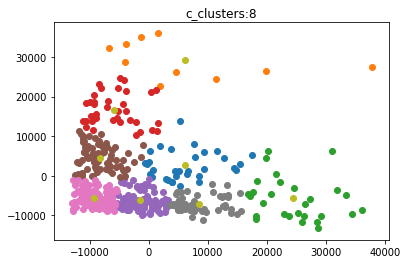

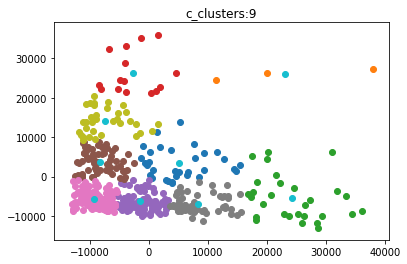

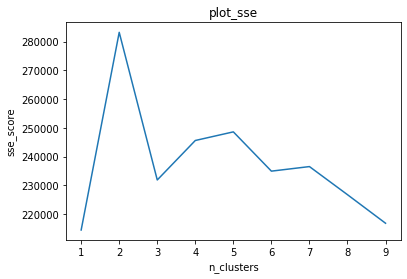

In [32]:
erubo(data_pca_rev2)

外れ値を削除する前は7が良さそうだが明らかにクラスと呼べない外れ値のみのクラス分類もある。外れ値を削除した後は３でうまく分類できており３が打倒と判断。

# 【問題11】既知のグループとの比較\
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

Channelでクラス分類

In [59]:
df_c = df["Channel"]
np.unique(df_c)

array([1, 2])

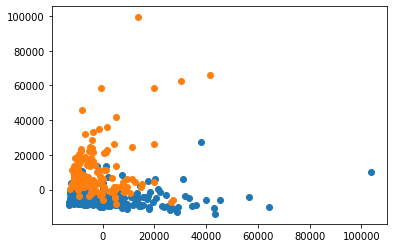

In [64]:
for l in np.unique(df_c):
    plt.scatter(data_pca[df_c==l, 0], data_pca[df_c==l, 1])

Regionでクラス分類

In [65]:
df_r = df["Region"]
np.unique(df_r)

array([1, 2, 3])

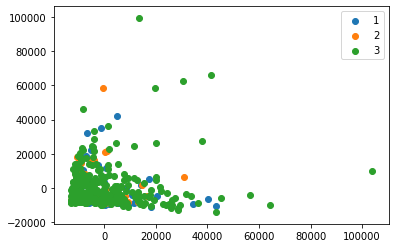

In [68]:
for l in np.unique(df_r):
    plt.scatter(data_pca[df_r==l, 0], data_pca[df_r==l, 1], label="{}".format(l))
plt.legend(loc="upper right")

Regionは地域３が全域に渡っており分類が不可能、 Channelに関してはkmeansクラス分類のK＝２と近似している。

# 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください

In [97]:
display(df.describe())
for r in np.unique(df["Region"]):
    for c in np.unique(df["Channel"]):
        print("Region:{} Channel:{}".format(r, c))
        display(df[df["Region"]==r][df["Channel"]==c].describe())


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Region:1 Channel:1


/Users/niikurasayaka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,59.0,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.0,1.0,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
std,0.0,0.0,12342.008901,4298.321195,3629.644143,3276.460124,1305.907616,1219.945304
min,1.0,1.0,514.000000,258.000000,489.000000,91.000000,5.000000,7.000000
25%,1.0,1.0,4437.500000,1071.000000,1620.000000,966.000000,237.000000,374.000000
50%,1.0,1.0,8656.000000,2280.000000,2576.000000,1859.000000,412.000000,749.000000
75%,1.0,1.0,18135.000000,4995.500000,5172.500000,4479.000000,874.000000,1621.500000
max,1.0,1.0,56083.000000,23527.000000,16966.000000,18711.000000,5828.000000,6854.000000


Region:1 Channel:2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.0,1.0,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444
std,0.0,0.0,5415.521495,6609.221463,10414.687844,2424.774577,5515.878798,1626.486667
min,2.0,1.0,18.000000,2527.000000,5265.000000,61.000000,788.000000,120.000000
25%,2.0,1.0,2378.250000,6253.250000,10634.250000,923.500000,4818.250000,746.000000
50%,2.0,1.0,2926.000000,8866.000000,16106.000000,1522.000000,6177.000000,1414.000000
75%,2.0,1.0,5988.000000,13112.250000,23478.750000,3843.000000,11804.750000,2456.500000
max,2.0,1.0,20782.000000,28326.000000,39694.000000,8321.000000,19410.000000,6372.000000


Region:2 Channel:1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,28.0,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,1.0,2.0,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857
std,0.0,0.0,8969.362752,2968.628697,3048.298815,11454.478518,425.310506,1056.778800
min,1.0,2.0,3.000000,333.000000,1330.000000,264.000000,15.000000,51.000000
25%,1.0,2.0,4938.250000,1146.000000,2373.750000,962.250000,182.750000,567.250000
50%,1.0,2.0,9787.000000,1560.500000,3352.000000,2696.500000,325.000000,883.000000
75%,1.0,2.0,17031.500000,2344.750000,5527.500000,4617.000000,707.000000,1146.000000
max,1.0,2.0,32717.000000,16784.000000,13626.000000,60869.000000,1679.000000,5609.000000


Region:2 Channel:2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.0,2.0,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000
std,0.0,0.0,6867.934548,6611.354136,14035.453775,2473.266471,8286.748255,1065.438042
min,2.0,2.0,161.000000,928.000000,2743.000000,131.000000,332.000000,59.000000
25%,2.0,2.0,2368.000000,4148.500000,9318.500000,639.500000,3900.000000,392.500000
50%,2.0,2.0,6468.000000,6817.000000,12469.000000,934.000000,6236.000000,1037.000000
75%,2.0,2.0,9162.000000,13127.500000,19785.500000,1410.000000,9837.500000,1815.000000
max,2.0,2.0,27082.000000,25071.000000,67298.000000,11559.000000,38102.000000,3508.000000


Region:3 Channel:1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,211.0,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.0,3.0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
std,0.0,0.0,14746.572913,4508.505269,3593.506056,4956.590848,1099.970640,3663.183304
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.0,3.0,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000
50%,1.0,3.0,9612.000000,2247.000000,2642.000000,1960.000000,375.000000,823.000000
75%,1.0,3.0,18821.000000,4205.000000,4927.500000,4542.500000,948.500000,1582.000000
max,1.0,3.0,112151.000000,43950.000000,21042.000000,36534.000000,6907.000000,47943.000000


Region:3 Channel:2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,105.0,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,2.0,3.0,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524
std,0.0,0.0,9635.394129,10574.827178,12298.935356,1504.498737,6022.091110,2119.052222
min,2.0,3.0,23.000000,1124.000000,4523.000000,33.000000,523.000000,3.000000
25%,2.0,3.0,2343.000000,6128.000000,9170.000000,437.000000,3537.000000,545.000000
50%,2.0,3.0,7362.000000,7845.000000,12121.000000,1059.000000,5121.000000,1386.000000
75%,2.0,3.0,15076.000000,11114.000000,19805.000000,2194.000000,7677.000000,2158.000000
max,2.0,3.0,44466.000000,73498.000000,92780.000000,8132.000000,40827.000000,16523.000000


/Users/niikurasayaka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


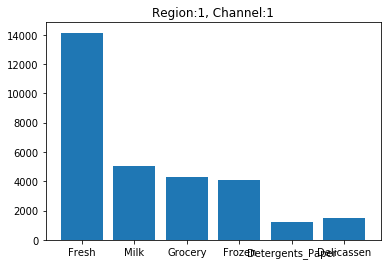

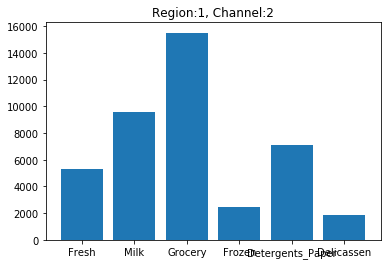

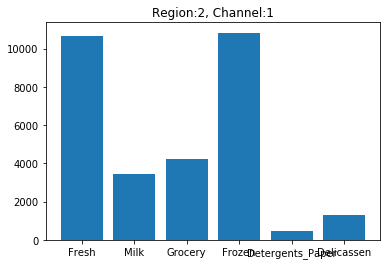

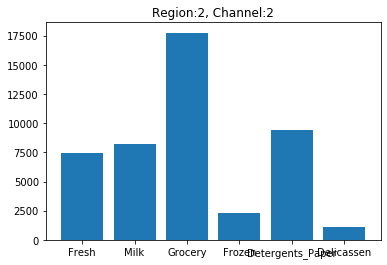

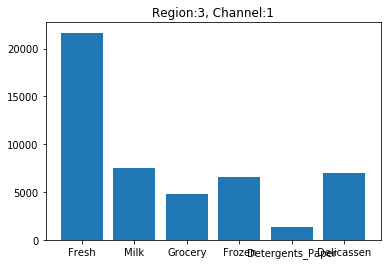

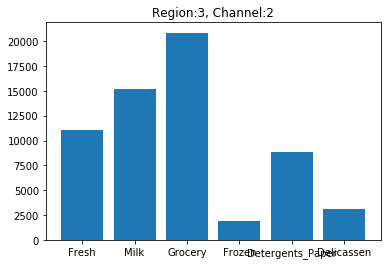

In [104]:
for r in np.unique(df["Region"]):
    for c in np.unique(df["Channel"]):
        columns = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
        sale_list = list(df[df["Region"]==r][df["Channel"]==c].describe().mean()[2:])
        plt.bar(columns, sale_list)
        plt.title("Region:{}, Channel:{}".format(r, c))
        plt.show()

売り上げの多いFreshとGroceryにてクラス別散布図作成

In [79]:
df_2 = df[["Fresh", "Grocery"]]

,Fresh,Grocery
0,12669,7561
1,7057,9568
2,6353,7684
3,13265,4221
4,22615,7198
...,...,...
435,29703,16027
436,39228,764
437,14531,30243
438,10290,2232


In [81]:
df_2 = np.array(df_2)

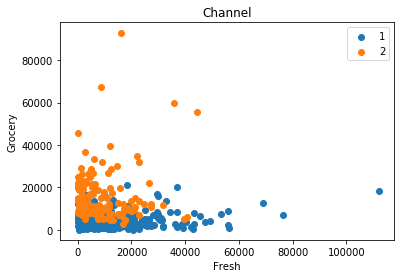

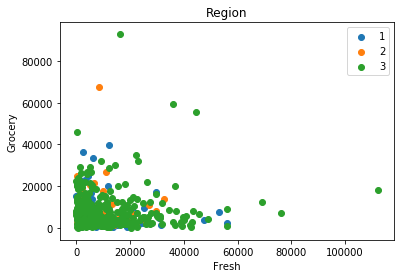

In [88]:
for l in np.unique(df_c):
    plt.scatter(df_2[df_c==l, 0], df_2[df_c==l, 1], label="{}".format(l))
plt.legend(loc="upper right")
plt.title("Channel")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()

for l in np.unique(df_r):
    plt.scatter(df_2[df_r==l, 0], df_2[df_r==l, 1], label="{}".format(l))
plt.legend(loc="upper right")
plt.title("Region")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()

各チャンネル・地域別の売れ筋の高い商品をピックアップすると\
R1,C1　⇨　Fresh\
R1,C2　⇨　Grocery\
R2,C1　⇨　Fresh,Frozen\
R2,C2　⇨　Grocery\
R3,C1　⇨　Fresh\
R3,C2　⇨　Grocery\
わかりやすく、C1はFresh、C2はGroceryの売り上げが高い\
C1のR2に関してだけはFrozenの売り上げも大きい\
散布図をみてもRegionではあまりクラスごとに分かれておらずChannelごとに商品戦略を作成する方が良い。\
